# **Importing libraries and data**

In [1]:
import csv
import math
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn

from scipy import stats
from dateutil.parser import parse
from datetime import datetime
from IPython.display import display_html
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model
from pprint import pprint
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')

import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
################################################################################# USER DEFINED FIELDS ###########################################################################################
#################################################################################################################################################################################################
####### Load ADS using name and path

load_ads = pd.read_csv('gs://aes-analytics-0002-curated/Outage_Restoration/DPL_Curated_Datasets/DPL_Master_dataset_storm_all_v2.3.csv')
load_ads['TIME_OF_FIRST_CALL'] = pd.to_datetime(load_ads['TIME_OF_FIRST_CALL'], infer_datetime_format = True, errors = 'coerce')
load_ads = load_ads
# Getting info for training dataset
event_ = load_ads['EVENT']
outage_id = load_ads['OUTAGE_ID']

# Dropping unnecessary columns
load_ads = load_ads.drop(columns= ['Unnamed: 0','OUTAGE_ID', 'CIRCUIT', 'TIME_OF_FIRST_CALL', 'DEVICE',
                                   'DATE','STORM_TYPE','EVENT','DEVICESIZE','VOLTAGE'])

print(load_ads.shape)
display(load_ads.head())

(79979, 138)


,PHASE_A,PHASE_B,PHASE_C,PHASE_T,LFS_CUSTS,MED_CUSTS,EMR_CUSTS,UTL_CUSTS,MAJ_CUSTS,GOV_CUSTS,LRT_CUSTS,WIREDOWN_PTH,WIREDOWN_PTP,TREEONWIRE_PTH,TREEONWIRE_PTP,BROKENPOLE,FIREEXPLOSION,DAMAGEDTRANS,PRIORITY,CONFIDENCE,CUSTSTILLOUT,TTR,MAJOR,TORD_False,TORD_True,ACCOUNT_TYPE_COM,ACCOUNT_TYPE_CUS,ACCOUNT_TYPE_GOV,ACCOUNT_TYPE_IND,ACCOUNT_TYPE_RES,Day_flag,Hour_Sin,Hour_Cos,RANK_SUBSEQUENT_OTG,weekday,Weekend_flag,Marker_Location,Outages_in_last_1hr,Outages_in_last_2hr,Outages_in_last_3hr,Outages_in_last_4hr,Outages_in_last_5hr,Outages_in_last_6hr,Outages_in_last_7hr,Outages_in_last_8hr,Outages_in_last_9hr,Outages_in_last_10hr,Min_Distance_service_Center,Nearest_service_center,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,feelsLikeMax,heatIndexMin,heatIndexAvg,heatIndexMax,mslPresMin,mslPresAvg,mslPresMax,precip,radSolarMin,radSolarAvg,radSolarMax,radSolarTot,relHumMin,relHumAvg,relHumMax,sfcPresMin,sfcPresAvg,sfcPresMax,snowfall,spcHumMin,spcHumAvg,spcHumMax,tempMin,tempAvg,tempMax,windChillMin,windChillAvg,windChillMax,windDirAvg,windDir80mAvg,windDir100mAvg,windSpdMin,windSpdAvg,windSpdMax,windSpd80mMin,windSpd80mAvg,windSpd80mMax,windSpd100mMin,windSpd100mAvg,windSpd100mMax,wetBulbMin,wetBulbAvg,wetBulbMax,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,DEVICETYPE,TOPFUSE,TOTCUST_A,TOTCUST_B,TOTCUST_C,TOTCUST_T,UNDERGD,NORMALLYOPEN,TOTKVA_A,TOTKVA_B,TOTKVA_C,Total_Crew_dispatched,Total_Crew_available,Line_crew,Service_crew,Substation_crew,Network_crew,Contractor,rank,rank_cd,Slope_outages,Slope_ROC_outages,max_ROC_outages,max_index_ROC,weight_ROC,Total_Customers,Total_Key_Customers,Month_Sin,Month_Cos,Pole,Nearest_service_center_mod
0,True,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,H,0,351.40,0.0,8.0,0.0,False,False,False,False,False,False,0.258819,0.965926,1.0,Tuesday,False,Marker 25,0,0,0,0,0,2,3,4,4,4,9.594646,DSB,99.0,100.0,100.0,12.5,23.4,26.9,0.0,14.1,19.1,17.3,27.6,30.9,1006.5,1013.2,1021.3,1.31,0.0,29.7,154.9,711.9,77.4,84.0,90.5,972.7,979.1,986.8,10.8,1.7,2.8,3.1,17.3,27.6,30.9,0.0,14.1,19.1,52.0,54.0,54.0,14.3,20.3,23.3,16.9,22.7,25.7,16.6,22.5,25.5,16.1,26.2,29.2,13.6,9.0,14.1,1.0,13.1,1.169251,1.014496,FUSE,False,45.0,0.0,0.0,0.0,False,False,387.0,0.0,0.0,0,13,11,2,0,0,1,1.0,1.0,1.479751,7.105263e-01,2,5,1.0,45.0,0.0,0.5,0.866025,False,Center
1,False,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,H,0,188.82,0.0,3.0,0.0,False,False,False,False,False,True,0.965926,-0.258819,2.0,Tuesday,False,Marker 41,0,0,0,0,0,1,1,1,1,1,44.024088,Washington Court House,100.0,100.0,100.0,18.8,27.3,28.8,7.6,19.0,22.0,22.7,30.8,33.2,1004.4,1011.7,1020.8,1.39,0.0,29.4,140.0,705.1,80.9,86.9,91.0,967.4,974.7,983.0,0.5,2.3,3.2,3.4,22.7,30.8,33.2,7.6,19.0,22.0,54.0,56.0,56.0,13.8,18.2,21.1,16.0,20.2,23.1,15.8,20.0,23.0,21.5,29.5,31.3,10.5,7.3,15.6,0.0,10.1,1.124845,1.016126,FUSE,False,0.0,0.0,5.0,0.0,False,False,0.0,0.0,75.0,2,22,20,2,0,0,1,1.0,1.0,5.000000,-1.873501e-16,1,5,0.5,5.0,0.0,0.5,0.866025,False,Not_Center
2,False,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,H,0,87.47,0.0,2.0,0.0,False,False,False,False,False,True,0.965926,-0.258819,3.0,Tuesday,False,Marker 13,1,1,1,1,1,2,2,2,2,2,19.700468,Marysville,100.0,100.0,100.0,11.8,18.0,23.9,-1.6,6.7,16.4,16.2,22.0,27.3,1009.0,1016.1,1023.6,1.31,0.0,25.8,115.3,617.8,79.1,84.8,89.3,961.0,967.8,975.0,18.6,1.7,2.2,2.8,16.2,22.0,27.3,-1.6,6.7,16.4,47.0,49.0,49.0,12.9,20.5,24.1,15.5,23.2,27.0,15.3,22.9,26.6,15.2,20.8,26.1,11.1,11.2,14.0,0.0,10.2,1.128951,1.014568,FUSE,False,0.0,0.0,3.0,0.0,False,False,0.0,0.0,100.0,3,23,21,2,0,0,1,1.0,1.0,5.000000,-1.873501e-16,1,5,0.5,3.0,0.0,0.5,0.866025,False,Not_Center
3,False,False,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,H,0,85.97,0.0,6.0,0.0,True,False,False,False,False,True,0.707107,-0.707107,4

In [3]:
######################################################################## ALL USER DEFINED FUNCTION ARE LOGGED HERE #############################################################################
################################################################################################################################################################################################

# calculate rmse scores
def rmse(pred_test, y_test):
    return np.sqrt(((pred_test - y_test) ** 2).mean())

# calculate mape scores
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# get names of all categorical data present in data
def get_index_of_categorical_columns(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    return list(set(cols) - set(num_cols))

def do_union(lst1, lst2, lst3, lst4): 
    final_list = list(set(lst1) | set(lst2) | set(lst3) | set(lst4))
    return final_list 

def segment(x):
    if(x<=120):
        return "0-120"
    elif(x<=240):
        return "120-240"
    elif(x<=360):
        return "240-360"
    elif(x<=480):
        return "360-480"
    elif(x<=600):
        return "480-600"
    elif(x<=720):
        return "600-720"
    else:
        return ">720"
    
def segment_storm(x):
    if(x<=120):
        return "0-120"
    elif(x<=240):
        return "120-240"
    elif(x<=360):
        return "240-360"
    elif(x<=480):
        return "360-480"
    elif(x<=600):
        return "480-600"
    elif(x<=720):
        return "600-720"
    elif(x<=840):
        return "720-840"
    elif(x<=960):
        return "840-960"
    elif(x<=1080):
        return "960-1080"
    elif(x<=1200):
        return "1080-1200"
    elif(x<=1320):
        return "1200-1320"
    elif(x<=1440):
        return "1320-1440"
    else:
        return ">1440"
    
def style_diag(data):
    diag_mask = pd.DataFrame("", index=data.index, columns=data.columns)
    min_axis = min(diag_mask.shape)
    diag_mask.iloc[range(min_axis), range(min_axis)] = 'background-color:#aed581'
    return diag_mask

def customer_metrics(y_test,y_test_pred):
    df_pred = pd.DataFrame(data={'actualRaw': y_test, 'predictedRaw': y_test_pred})
    df_pred['Actual_segment'] = df_pred['actualRaw'].apply(segment)
    df_pred['Prediction_segment'] = df_pred['predictedRaw'].apply(segment)
    business_KPI = df_pred[['Actual_segment','Prediction_segment']]

    #conversion to percentage
    business_KPI = pd.pivot_table(business_KPI, index='Actual_segment',columns=['Prediction_segment'], values='Actual_segment', aggfunc=lambda x: len(x))
    business_KPI["total"] =  business_KPI.sum(axis=1)
    business_KPI.columns.name = 'Predicted_Values'
    business_KPI.index.name = 'Actual_Values'

    # Add the grand total row, summing all values in a column
    business_KPI.loc['total', :] = business_KPI.sum()
    business_KPI = business_KPI.round(0)
    return business_KPI

def customer_metrics_storm(y_test,y_test_pred):
    df_pred = pd.DataFrame(data={'actualRaw': y_test, 'predictedRaw': y_test_pred})
    df_pred['Actual_segment'] = df_pred['actualRaw'].apply(segment_storm)
    df_pred['Prediction_segment'] = df_pred['predictedRaw'].apply(segment_storm)
    business_KPI = df_pred[['Actual_segment','Prediction_segment']]

    #conversion to percentage
    business_KPI = pd.pivot_table(business_KPI, index='Actual_segment',columns=['Prediction_segment'], values='Actual_segment', aggfunc=lambda x: len(x))
    business_KPI["total"] =  business_KPI.sum(axis=1)
    business_KPI.columns.name = 'Predicted_Values'
    business_KPI.index.name = 'Actual_Values'

    # Add the grand total row, summing all values in a column
    business_KPI.loc['total', :] = business_KPI.sum()
    business_KPI = business_KPI.round(0)
    return business_KPI

# Preprocessing Data 

## Dummifying columns with Categorical Values

In [4]:
object_columns = load_ads.loc[:, (load_ads.dtypes == object) | (load_ads.dtypes == bool)]
print(list(object_columns.columns))

# Dummifying one hot code encoding
ads = load_ads[:]
ads = pd.get_dummies(ads, columns=['CONFIDENCE', 'weekday', 'Marker_Location', 'Nearest_service_center',
                                   'DEVICETYPE','Nearest_service_center_mod'])
print(ads.shape)

# Dropping duplicate columns
ads = ads.loc[:,~ads.columns.duplicated()]

print(ads.shape)

['PHASE_A', 'PHASE_B', 'PHASE_C', 'PHASE_T', 'WIREDOWN_PTH', 'WIREDOWN_PTP', 'TREEONWIRE_PTH', 'TREEONWIRE_PTP', 'BROKENPOLE', 'FIREEXPLOSION', 'DAMAGEDTRANS', 'PRIORITY', 'CONFIDENCE', 'ACCOUNT_TYPE_COM', 'ACCOUNT_TYPE_CUS', 'ACCOUNT_TYPE_GOV', 'ACCOUNT_TYPE_IND', 'ACCOUNT_TYPE_RES', 'Day_flag', 'weekday', 'Weekend_flag', 'Marker_Location', 'Nearest_service_center', 'DEVICETYPE', 'TOPFUSE', 'UNDERGD', 'NORMALLYOPEN', 'Pole', 'Nearest_service_center_mod']
(79979, 218)
(79979, 218)


# Distribution and transformation of Y-variable

## Target Variable Analysis: Is it Normal?

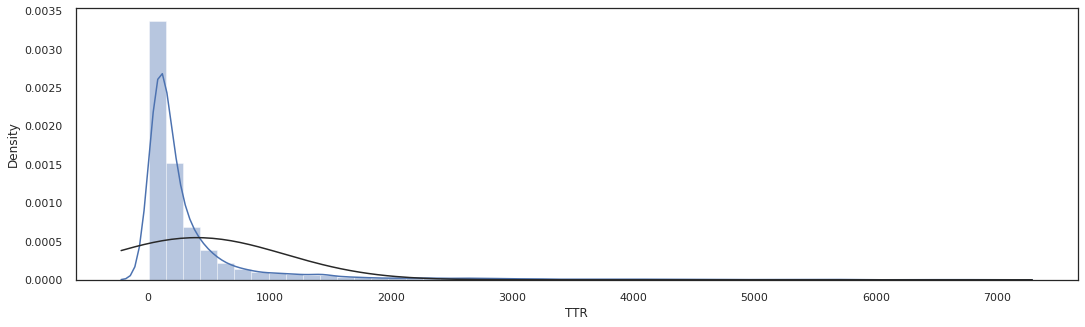

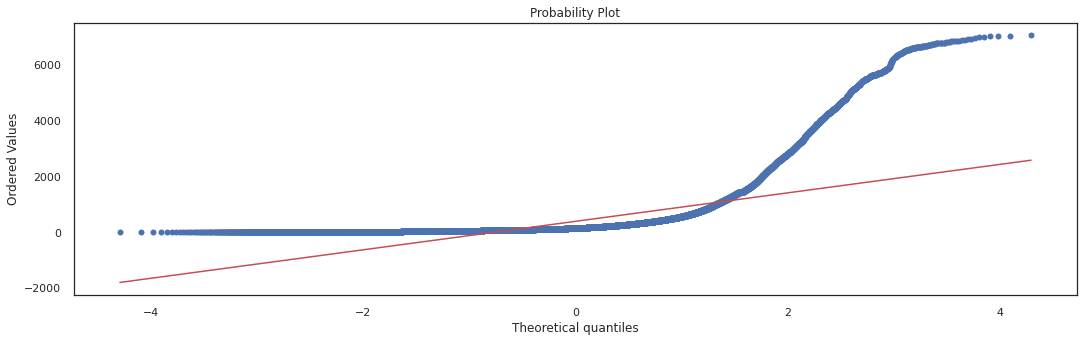

In [5]:
from scipy.stats import norm

sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("white")

sns.distplot(ads['TTR'],fit=norm);
fig = plt.figure()
res = stats.probplot(ads['TTR'], plot=plt)

In [ ]:
#### **Log Transformation of Tanget Variable (TTR)**

In [ ]:
# # Apply log e tranformation to the dataset
# ads['TTR'] = np.log(ads['TTR'])
# from scipy.stats import norm

# sns.set(rc={'figure.figsize':(16,5)})
# sns.set_style("white")

# sns.distplot(ads['TTR'],fit=norm);
# fig = plt.figure()
# res = stats.probplot(ads['TTR'], plot=plt)

In [6]:
%%time

#####################################################################
#####################################################################
#####################################################################
## FEATURE SELECTION : MAX VOTING REGIME ##
X = ads.drop(['TTR'],axis=1)
y = ads['TTR']

ols = LinearRegression()
ols.fit(X.values, y.values)
print('1')
pls = PLSRegression(n_components=15)
pls.fit(X.values, y.values)
print('1')
# rf = RandomForestRegressor(n_estimators=150, n_jobs = -1)
# rf.fit(X,y)
xg = xgb.XGBRegressor(n_jobs=-1, max_depth=15)
xg.fit(X,y)
print('1')
cat = CatBoostRegressor()
cat.fit(X,y)
print('1')

# ols = LinearRegression()
# ols.fit(X.values, y.values)
# pls = PLSRegression(n_components=15)
# pls.fit(X.values, y.values)
# rf = RandomForestRegressor(n_estimators=150, n_jobs = -1)
# rf.fit(X,y)
# xg = xgb.XGBRegressor(n_jobs=-1, max_depth=15)
# xg.fit(X,y)

# rf = RandomForestRegressor(n_estimators=150, n_jobs = -1)
# rf.fit(X,y)
# xg = xgb.XGBRegressor(n_jobs=-1, max_depth=15)
# xg.fit(X,y)

1
1
1
Learning rate set to 0.085139
0:	learn: 689.8563398	total: 62.7ms	remaining: 1m 2s
1:	learn: 657.1018910	total: 72.4ms	remaining: 36.1s
2:	learn: 627.2528723	total: 83ms	remaining: 27.6s
3:	learn: 601.3703732	total: 93ms	remaining: 23.2s
4:	learn: 577.7621801	total: 102ms	remaining: 20.3s
5:	learn: 556.4478901	total: 112ms	remaining: 18.5s
6:	learn: 537.1755448	total: 120ms	remaining: 17.1s
7:	learn: 520.7664465	total: 129ms	remaining: 16s
8:	learn: 505.8681677	total: 138ms	remaining: 15.1s
9:	learn: 492.9276430	total: 147ms	remaining: 14.5s
10:	learn: 482.2100107	total: 156ms	remaining: 14s
11:	learn: 472.8465182	total: 165ms	remaining: 13.6s
12:	learn: 463.7053915	total: 174ms	remaining: 13.2s
13:	learn: 456.2000059	total: 185ms	remaining: 13.1s
14:	learn: 449.3444399	total: 194ms	remaining: 12.7s
15:	learn: 443.1218164	total: 203ms	remaining: 12.5s
16:	learn: 437.7212205	total: 212ms	remaining: 12.3s
17:	learn: 432.8781323	total: 221ms	remaining: 12.1s
18:	learn: 428.7044604	t

In [8]:
ols_reg = pd.DataFrame({'Features': X.columns, 'Importance_Score_ols': ols.coef_}).sort_values(by='Importance_Score_ols',ascending=False)
pls_reg = pd.DataFrame({'Features': X.columns, 'Importance_Score_PLS': pls.coef_.ravel()}).sort_values(by='Importance_Score_PLS',ascending=False)
# rftrees = pd.DataFrame({'Features': X.columns, 'Importance_Score_Random_Forest': rf.feature_importances_}).sort_values(by='Importance_Score_Random_Forest',ascending=False)
xgboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_XGBoost': xg.feature_importances_}).sort_values(by='Importance_Score_XGBoost',ascending=False)
catboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_CatBoost': cat.feature_importances_}).sort_values(by='Importance_Score_CatBoost',ascending=False)

ols_reg.reset_index(drop=True,inplace=True)
pls_reg.reset_index(drop=True,inplace=True)
# rftrees.reset_index(drop=True,inplace=True)
xgboost.reset_index(drop=True,inplace=True)
catboost.reset_index(drop=True,inplace=True)

ols_reg = ols_reg.head(20)
pls_reg = pls_reg.head(20)
# rftrees = rftrees.head(40)
xgboost = xgboost.head(40)
catboost = catboost.head(60)

In [ ]:
## **Feature Importance using Ordinary Least Square**

In [ ]:
# sns.set(rc={'figure.figsize':(18,5)})
# sns.set_style("white")
# ax = sns.barplot(x="Importance_Score_ols", y="Features", data=ols_reg, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : Lasso')

In [ ]:
# display(ols_reg)

## **Feature Importance using Partial Least Square**

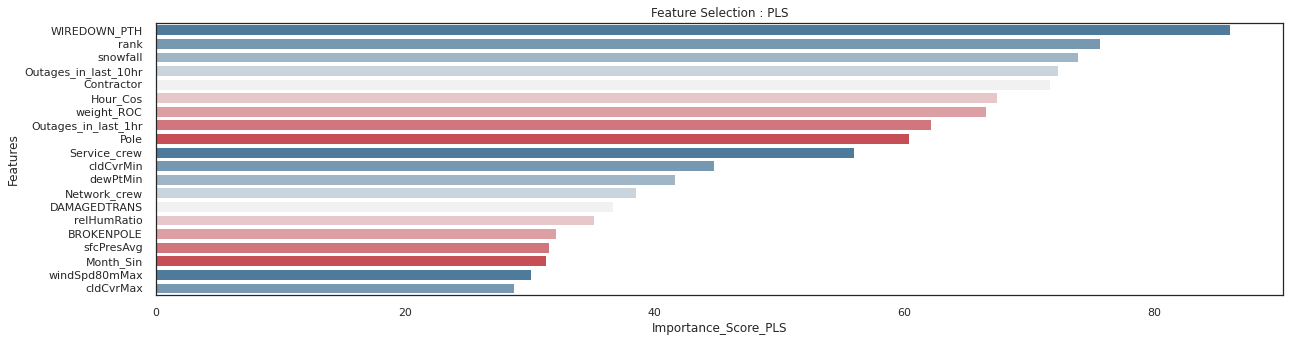

In [9]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score_PLS", y="Features", data=pls_reg , palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : PLS')

In [10]:
display(pls_reg)

,Features,Importance_Score_PLS
0,WIREDOWN_PTH,86.039864
1,rank,75.643085
2,snowfall,73.898328
3,Outages_in_last_10hr,72.299944
4,Contractor,71.660628
5,Hour_Cos,67.369909
6,weight_ROC,66.550277
7,Outages_in_last_1hr,62.138561
8,Pole,60.325492
9,Service_crew,55.919163


In [ ]:
## **Feature Importance using Random Forest**

In [ ]:
# sns.set(rc={'figure.figsize':(18,5)})
# sns.set_style("white")
# ax = sns.barplot(x="Importance_Score_Random_Forest", y="Features", data=rftrees, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : Random Forest')

In [ ]:
# display(rftrees)

## **Feature Importance using XGBoost**

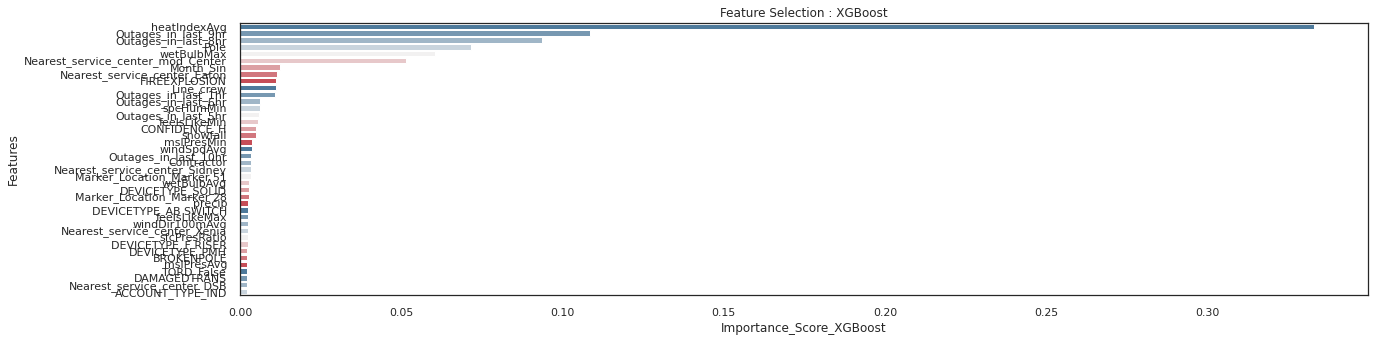

In [11]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score_XGBoost", y="Features", data=xgboost, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : XGBoost')

In [12]:
display(xgboost)

,Features,Importance_Score_XGBoost
0,heatIndexAvg,0.332955
1,Outages_in_last_9hr,0.108540
2,Outages_in_last_8hr,0.093725
3,Pole,0.071720
4,wetBulbMax,0.060577
5,Nearest_service_center_mod_Center,0.051419
6,Month_Sin,0.012253
7,Nearest_service_center_Eaton,0.011432
8,FIREEXPLOSION,0.011142
9,Line_crew,0.011127


## **Feature Importance using CatBoost**

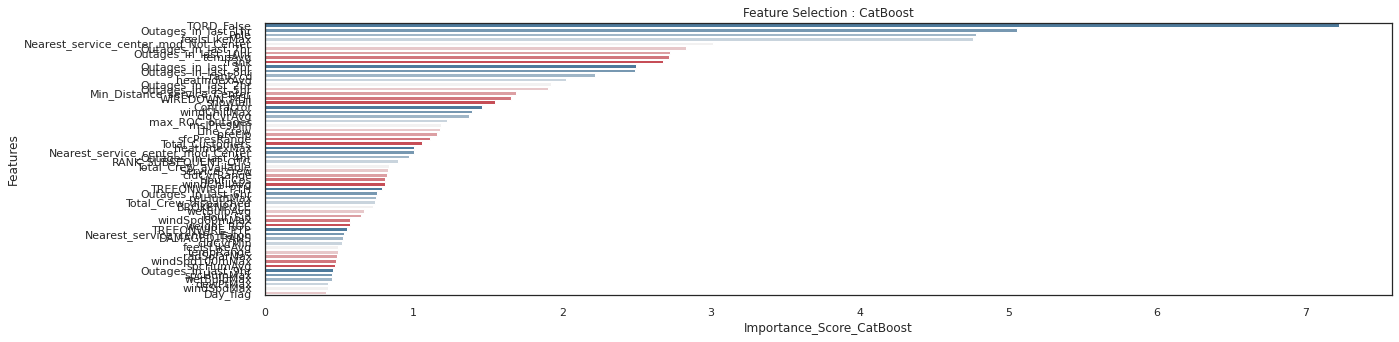

In [13]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score_CatBoost", y="Features", data=catboost, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : CatBoost')

In [14]:
display(catboost)

,Features,Importance_Score_CatBoost
0,TORD_False,7.224017
1,Outages_in_last_1hr,5.056751
2,Pole,4.785943
3,feelsLikeMax,4.760742
4,Nearest_service_center_mod_Not_Center,3.013640
5,Outages_in_last_7hr,2.833073
6,Outages_in_last_10hr,2.721744
7,tempAvg,2.717592
8,rank,2.676814
9,Outages_in_last_3hr,2.495690


## **Final Features Selected after Union (Max Voting Regime)**

In [15]:
final_features = pd.DataFrame()
final_features['XG Boost'] = xgboost.Features
# final_features['Random Forest'] = rftrees.Features
final_features['OLS'] = ols_reg.Features
final_features['PLS'] = pls_reg.Features
final_features['CATB'] = catboost.Features


display(final_features)

final_features = do_union(list(xgboost.Features), list(catboost.Features), list(ols_reg.Features), list(pls_reg.Features))
print("/n Features selected:")
print(len(final_features), "No. of Features Selected")
print(final_features)

# final_features = catboost.Features.to_list()

,XG Boost,OLS,PLS,CATB
0,heatIndexAvg,sfcPresRatio,WIREDOWN_PTH,TORD_False
1,Outages_in_last_9hr,TORD_True,rank,Outages_in_last_1hr
2,Outages_in_last_8hr,ACCOUNT_TYPE_CUS,snowfall,Pole
3,Pole,Substation_crew,Outages_in_last_10hr,feelsLikeMax
4,wetBulbMax,WIREDOWN_PTH,Contractor,Nearest_service_center_mod_Not_Center
5,Nearest_service_center_mod_Center,DAMAGEDTRANS,Hour_Cos,Outages_in_last_7hr
6,Month_Sin,BROKENPOLE,weight_ROC,Outages_in_last_10hr
7,Nearest_service_center_Eaton,DEVICETYPE_SWTCHGEAR,Outages_in_last_1hr,tempAvg
8,FIREEXPLOSION,Pole,Pole,rank
9,Line_crew,relHumRatio,Service_crew,Outages_in_last_3hr


/n Features selected:
94 No. of Features Selected
['precip', 'feelsLikeAvg', 'Nearest_service_center_mod_Not_Center', 'mslPresMin', 'heatIndexAvg', 'rank', 'Contractor', 'Nearest_service_center_Xenia', 'sfcPresAvg', 'Month_Sin', 'Nearest_service_center_Sidney', 'Nearest_service_center_mod_Center', 'Marker_Location_Marker 47', 'BROKENPOLE', 'Marker_Location_Marker 46', 'DEVICETYPE_SOLID', 'Substation_crew', 'DEVICETYPE_F RISER', 'Marker_Location_Marker 51', 'WIREDOWN_PTH', 'feelsLikeMin', 'Network_crew', 'Outages_in_last_1hr', 'cldCvrMax', 'Line_crew', 'TORD_True', 'TREEONWIRE_PTH', 'windSpdMax', 'DEVICETYPE_PMH', 'spcHumAvg', 'radSolarMax', 'Outages_in_last_7hr', 'Nearest_service_center_Eaton', 'RANK_SUBSEQUENT_OTG', 'tempRange', 'Nearest_service_center_DSB', 'ACCOUNT_TYPE_IND', 'dewPtMax', 'windDir100mAvg', 'DEVICETYPE_AB SWITCH', 'sfcPresRange', 'tempAvg', 'CONFIDENCE_H', 'windSpd80mMax', 'FIREEXPLOSION', 'wetBulbMax', 'Outages_in_last_10hr', 'sfcPresRatio', 'weight_ROC', 'DEVICETYPE

### **View Data-set after feature selection**

In [16]:
ads_v1 = ads[final_features]
ads_v1['TTR'] = ads['TTR']
display(ads_v1.head())

,precip,feelsLikeAvg,Nearest_service_center_mod_Not_Center,mslPresMin,heatIndexAvg,rank,Contractor,Nearest_service_center_Xenia,sfcPresAvg,Month_Sin,Nearest_service_center_Sidney,Nearest_service_center_mod_Center,Marker_Location_Marker 47,BROKENPOLE,Marker_Location_Marker 46,DEVICETYPE_SOLID,Substation_crew,DEVICETYPE_F RISER,Marker_Location_Marker 51,WIREDOWN_PTH,feelsLikeMin,Network_crew,Outages_in_last_1hr,cldCvrMax,Line_crew,TORD_True,TREEONWIRE_PTH,windSpdMax,DEVICETYPE_PMH,spcHumAvg,radSolarMax,Outages_in_last_7hr,Nearest_service_center_Eaton,RANK_SUBSEQUENT_OTG,tempRange,Nearest_service_center_DSB,ACCOUNT_TYPE_IND,dewPtMax,windDir100mAvg,DEVICETYPE_AB SWITCH,sfcPresRange,tempAvg,CONFIDENCE_H,windSpd80mMax,FIREEXPLOSION,wetBulbMax,Outages_in_last_10hr,sfcPresRatio,weight_ROC,DEVICETYPE_SWTCHGEAR,max_ROC_outages,relHumMax,Hour_Sin,cldCvrRange,cldCvrMin,sfcPresMin,Outages_in_last_6hr,Marker_Location_Marker 37,windSpd100mMax,spcHumMax,TREEONWIRE_PTP,Total_Crew_available,Min_Distance_service_Center,heatIndexMax,Marker_Location_Marker 45,Service_crew,cldCvrAvg,Day_flag,rank_cd,Total_Crew_dispatched,ACCOUNT_TYPE_CUS,Marker_Location_Marker 28,Outages_in_last_4hr,dewPtMin,mslPresAvg,feelsLikeMax,wetBulbAvg,Outages_in_last_2hr,windChillMax,Marker_Location_Marker 49,Total_Customers,spcHumMin,windSpdAvg,DAMAGEDTRANS,Outages_in_last_8hr,Outages_in_last_3hr,Pole,snowfall,Outages_in_last_5hr,Outages_in_last_9hr,TORD_False,Hour_Cos,windChillAvg,relHumRatio,TTR
0,1.31,14.1,0,1006.5,27.6,1.0,1,0,979.1,0.5,0,1,0,False,0,0,0,0,0,False,0.0,0,0,100.0,11,0.0,False,23.3,0,2.8,154.9,3,0,1.0,13.6,1,False,26.9,54.0,0,14.1,27.6,1,25.7,False,29.2,4,1.014496,1.0,0,2,90.5,0.258819,1.0,99.0,972.7,2,0,25.5,3.1,False,13,9.594646,30.9,0,2,100.0,False,1.0,0,False,0,0,12.5,1013.2,19.1,26.2,0,19.1,0,45.0,1.7,20.3,True,4,0,False,10.8,0,4,8.0,0.965926,14.1,1.169251,351.40
1,1.39,19.0,1,1004.4,30.8,1.0,1,0,974.7,0.5,0,0,0,False,0,0,0,0,0,False,7.6,0,0,100.0,20,0.0,False,21.1,0,3.2,140.0,1,0,2.0,10.5,0,False,28.8,56.0,0,15.6,30.8,1,23.1,False,31.3,1,1.016126,0.5,0,1,91.0,0.965926,0.0,100.0,967.4,1,0,23.0,3.4,False,22,44.024088,33.2,0,2,100.0,True,1.0,2,False,0,0,18.8,1011.7,22.0,29.5,0,22.0,0,5.0,2.3,18.2,False,1,0,False,0.5,0,1,3.0,-0.258819,19.0,1.124845,188.82
2,1.31,6.7,1,1009.0,22.0,1.0,1,0,967.8,0.5,0,0,0,False,0,0,0,0,0,False,-1.6,0,1,100.0,21,0.0,False,24.1,0,2.2,115.3,2,0,3.0,11.1,0,False,23.9,49.0,0,14.0,22.0,1,27.0,False,26.1,2,1.014568,0.5,0,1,89.3,0.965926,0.0,100.0,961.0,2,0,26.6,2.8,False,23,19.700468,27.3,0,2,100.0,True,1.0,3,False,0,1,11.8,1016.1,16.4,20.8,1,16.4,0,3.0,1.7,20.5,False,2,1,False,18.6,1,2,2.0,-0.258819,6.7,1.128951,87.47
3,1.36,14.8,1,1005.6,27.8,1.0,1,1,973.5,0.5,0,0,0,False,0,0,0,0,0,False,3.7,0,0,100.0,27,0.0,False,23.0,0,2.9,150.0,2,0,4.0,11.1,0,False,26.9,53.0,0,15.2,27.8,1,25.2,False,29.4,3,1.015732,0.1,0,1,92.0,0.707107,0.0,100.0,966.2,2,0,25.2,3.2,False,29,16.515180,30.9,0,2,100.0,True,1.0,6,False,0,2,16.1,1013.0,18.5,26.7,1,18.5,0,10.0,2.0,19.2,False,3,2,False,4.0,2,3,6.0,-0.707107,14.8,1.113801,85.97
4,1.36,12.1,0,1007.5,26.1,1.0,1,0,983.0,0.5,0,1,0,False,0,0,0,0,0,False,-0.8,0,1,100.0,29,0.0,False,24.3,0,2.6,141.2,4,0,6.0,12.8,1,False,26.2,52.0,0,13.8,26.1,1,26.2,False,28.4,5,1.014129,0.1,0,1,89.2,0.500000,0.0,100.0,976.7,4,0,26.1,3.0,False,31,2.921356,29.6,0,2,100.0,True,1.0,3,False,0,4,11.7,1014.1,18.9,24.8,2,18.9,0,64.0,1.6,20.7,False,4,3,False,16.0,4,5,1.0,-0.866025,12.1,1.159948,154.60


In [ ]:
### **Correlation Matrix of Selected Variables**

In [ ]:
#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix=ads_v1.corr(method='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(30,30))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr_matrix,2), mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
### **BoxPlot of selected Variables**

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("white")
for i, col in enumerate(list(ads.columns.values)):
    plt.subplot(14,5,i+1)
    ads.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [ ]:
### **Distribution Plot of selected Variables**

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style("white")
for i, col in enumerate(list(ads.columns.values)):
    plt.subplot(14,5,i+1)
    sns.distplot(ads[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

# **Train-Test Split using sklearn**

In [71]:
X = ads[final_features]
X['Event'] = event_
y = ads['TTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(columns = ['Event'])
event_ = X_test['Event']
X_test = X_test.drop(columns = ['Event'])
print('\n')
print('\n')
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))
print('\n')
print('\n')





63983 15996
63983 15996






# **Building Baseline CatBoost Model**
- CatBoost is an algorithm for gradient boosting on decision trees.

Parameters for Baseline -

n_estimators = 2000, loss_function = 'MAE', eval_metric = 'RMSE'

In [72]:
model_col = ['MODEL_NAME' , 'TRAIN_MSE', 'TRAIN_RMSE', 'TRAIN_MAE', 'TRAIN_MAPE', 'TRAIN_R2','TRAIN__Adj_R2', 'TEST_MSE', 'TEST_RMSE', 'TEST_MAE', 'TEST_MAPE', 'TEST_R2','Test__Adj_R2']
model_result_df = pd.DataFrame(columns=model_col)
data_train_list = pd.DataFrame()
data_test_list = pd.DataFrame()
i=0

In [ ]:
# {'n_estimators': 2834, 'loss_function': 'MAE', 'learning_rate': 0.06816326530612245, 'leaf_estimation_iterations': 2, 'l2_leaf_reg': 7, 'eval_metric': 'RMSE', 'depth': 6}

In [73]:
cat_base = CatBoostRegressor(n_estimators = 2000, loss_function = 'MAE', eval_metric = 'RMSE',random_state=1235)
cat_base.fit(X_train, y_train)

y_train_pred = cat_base.predict(X_train)
# y_train_pred = np.exp(y_train_pred)

y_test_pred = cat_base.predict(X_test)
# y_test_pred = np.exp(y_test_pred)

# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

n = len(y_train)
p = len(final_features)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'CATB Baseline', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'CATB Baseline', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['CATB Baseline', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test, adj_r2_test]
i = i + 1

0:	learn: 759.9328978	total: 11.6ms	remaining: 23.2s
1:	learn: 752.7825916	total: 23ms	remaining: 23s
2:	learn: 746.2007246	total: 34.8ms	remaining: 23.2s
3:	learn: 739.7422854	total: 46.1ms	remaining: 23s
4:	learn: 731.6921554	total: 57.6ms	remaining: 23s
5:	learn: 724.6086188	total: 69.2ms	remaining: 23s
6:	learn: 716.7429350	total: 81ms	remaining: 23.1s
7:	learn: 706.9134061	total: 92.3ms	remaining: 23s
8:	learn: 701.3619364	total: 113ms	remaining: 25s
9:	learn: 695.6957425	total: 124ms	remaining: 24.7s
10:	learn: 688.1341511	total: 136ms	remaining: 24.5s
11:	learn: 683.3094816	total: 147ms	remaining: 24.4s
12:	learn: 675.3730581	total: 158ms	remaining: 24.2s
13:	learn: 669.8430718	total: 169ms	remaining: 24s
14:	learn: 664.5757879	total: 181ms	remaining: 23.9s
15:	learn: 659.2890849	total: 192ms	remaining: 23.8s
16:	learn: 654.5460955	total: 203ms	remaining: 23.7s
17:	learn: 648.5481083	total: 215ms	remaining: 23.7s
18:	learn: 642.6998669	total: 226ms	remaining: 23.6s
19:	learn: 63

In [74]:
model_result_df.head()

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,CATB Baseline,112740.719056,335.768848,163.115896,67.144633,0.78774,0.787427,128817.894618,358.912099,177.985048,73.415728,0.751678,0.751312


In [75]:
y_test_baseline = y_test
y_test_pred_baseline = y_test_pred

## **CatBoost Baseline: Actual vs Fitted PLot**

Text(0.5, 1.0, 'Actual vs Fitted : CATB Baseline')

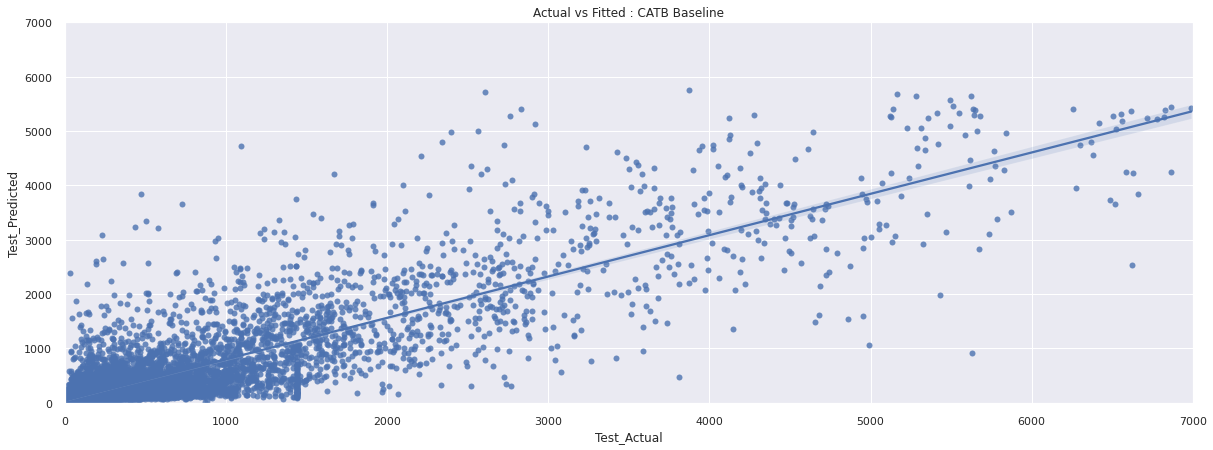

In [76]:
sns.set(rc={'figure.figsize':(18,7)})
sns.set_style("darkgrid")

ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='CATB Baseline'])
ax.set_xlim(0,7000)
ax.set_ylim(0,7000)
ax.set_title('Actual vs Fitted : CATB Baseline')

In [ ]:
#### **Random Forest Baseline : Residual PLot**

In [ ]:
sns.set(rc={'figure.figsize':(30,7)})
sns.set_style("white")

visualizer = ResidualsPlot(cat_base)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

# **Grid Search with Cross Validation**
- Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try
- We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

In [25]:
pprint(cat_base.get_all_params())

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'grow_policy': 'SymmetricTree',
 'iterations': 2000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Exact',
 'learning_rate': 0.029999999329447743,
 'loss_function': 'MAE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fraction': 0,
 'subsample': 0.800000011920929,
 'task_type': 'CPU',
 'use_best_model': 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
               'n_estimators': [1500, 1800, 2000, 2200, 2400],
               'depth': [5,6,7],
               'l2_leaf_reg': [2,3,4]
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
cat_gs = CatBoostRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = cat_gs, param_grid = param_grid, cv = 2, scoring='neg_mean_absolute_error', n_jobs = -1, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best Paramters using Grid Search:")
print(grid_search.best_params_)

Parameters from Grid Search -

{'depth': 7, 
'l2_leaf_reg': 2,
'n_estimators': 2400}

#### **Building Grid Search Best Model**

In [27]:
cat_gs = CatBoostRegressor(n_estimators=2400, loss_function='MAE', eval_metric='RMSE', depth=7, l2_leaf_reg=2, random_state=1235)

cat_gs.fit(X_train, y_train)

y_train_pred = cat_gs.predict(X_train)
# y_train_pred = np.exp(y_train_pred)

y_test_pred = cat_gs.predict(X_test)
# y_test_pred = np.exp(y_test_pred)

# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'CATB Grid Search', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'CATB Grid Search', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['CATB Grid Search', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test,adj_r2_test]
i = i + 1

0:	learn: 758.5792631	total: 15.1ms	remaining: 36.2s
1:	learn: 747.7894802	total: 29.1ms	remaining: 34.9s
2:	learn: 741.0132073	total: 42.8ms	remaining: 34.2s
3:	learn: 734.2012087	total: 56.5ms	remaining: 33.9s
4:	learn: 727.4284378	total: 70.1ms	remaining: 33.6s
5:	learn: 720.7600659	total: 83.4ms	remaining: 33.3s
6:	learn: 712.5618385	total: 96.6ms	remaining: 33s
7:	learn: 703.5146610	total: 110ms	remaining: 32.9s
8:	learn: 693.5902451	total: 123ms	remaining: 32.8s
9:	learn: 685.7487353	total: 137ms	remaining: 32.8s
10:	learn: 680.6197809	total: 151ms	remaining: 32.8s
11:	learn: 673.4113638	total: 165ms	remaining: 32.8s
12:	learn: 666.8725070	total: 181ms	remaining: 33.3s
13:	learn: 659.8748600	total: 204ms	remaining: 34.8s
14:	learn: 651.9692438	total: 224ms	remaining: 35.6s
15:	learn: 647.5970720	total: 237ms	remaining: 35.4s
16:	learn: 639.9103070	total: 254ms	remaining: 35.6s
17:	learn: 633.3117668	total: 267ms	remaining: 35.3s
18:	learn: 628.7563930	total: 280ms	remaining: 35.1

In [28]:
model_result_df

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,CATB Baseline,113071.773785,336.261466,163.367229,67.226500,0.787116,0.786803,127728.099842,357.390682,177.640947,73.401412,0.753779,0.753416
1,CATB Grid Search,100715.004471,317.356274,152.305409,62.821805,0.810381,0.810102,125506.601851,354.269109,176.405403,73.429891,0.758061,0.757705


In [29]:
data_train_list.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Train_Data_DPL_CATB_1_11232020_1.csv')
data_test_list.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Test_Data_DPL_CATB_1_11232020_1.csv')

In [30]:
y_test_grid_search = y_test
y_test_pred_grid_search = y_test_pred

# y_train = np.log(y_train)
# y_test = np.log(y_test)

#### **Random Forest Grid Search: Actual vs Fitted Plot**

Text(0.5, 1.0, 'Actual vs Fitted : Random Forest Grid Search CV')

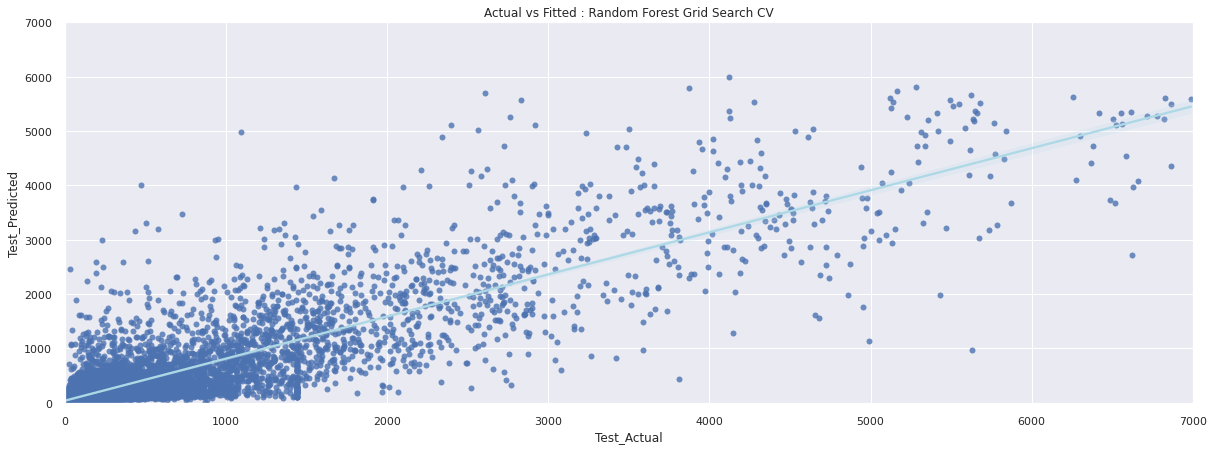

In [31]:
sns.set(rc={'figure.figsize':(18,7)})
sns.set_style("darkgrid")
ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='CATB Grid Search'], line_kws={"color": "lightblue"})
ax.set_xlim(0,7000)
ax.set_ylim(0,7000)
ax.set_title('Actual vs Fitted : Random Forest Grid Search CV')

# **Selecting the best model**

In [32]:
model_result_df

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,CATB Baseline,113071.773785,336.261466,163.367229,67.226500,0.787116,0.786803,127728.099842,357.390682,177.640947,73.401412,0.753779,0.753416
1,CATB Grid Search,100715.004471,317.356274,152.305409,62.821805,0.810381,0.810102,125506.601851,354.269109,176.405403,73.429891,0.758061,0.757705


## **Model business metric** Storm + Bluesky

In [87]:
y_test_pred = y_test_pred_baseline
y_test = y_test_baseline

business_KPI = customer_metrics(y_test,y_test_pred)
# y_train = np.log(y_train)
# y_test = np.log(y_test)
# y_test_pred = np.log(y_test_pred)

df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage

Predicted_Values,0-120,120-240,240-360,360-480,480-600,600-720,>720,total
Actual_Values,,,,,,,,
0-120,26.3%,11.8%,1.2%,0.3%,0.1%,0.0%,0.1%,39.8%
120-240,10.0%,9.9%,2.4%,0.8%,0.3%,0.2%,0.3%,24.0%
240-360,2.5%,4.7%,1.9%,0.9%,0.4%,0.2%,0.3%,10.9%
360-480,0.7%,2.3%,1.5%,0.9%,0.4%,0.2%,0.3%,6.2%
480-600,0.3%,1.4%,0.9%,0.6%,0.4%,0.1%,0.4%,4.0%
600-720,0.2%,0.6%,0.6%,0.3%,0.2%,0.1%,0.3%,2.3%
>720,0.2%,1.0%,1.0%,0.9%,0.7%,0.8%,8.1%,12.7%
total,40.1%,31.8%,9.4%,4.7%,2.5%,1.6%,9.9%,100.0%


## Splitting the metric in Storm and Blue sky events

In [88]:
df_result = pd.DataFrame(data={'y_test': y_test, 'y_test_pred': y_test_pred , 'EVENT': event_})
# df_result.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Testdata_DPL_Datarobo_RF_Ckt_lvl_10292020_1.csv')
model_col = ['EVENT' , 'TEST_MSE', 'TEST_RMSE', 'TEST_MAE', 'TEST_MAPE']
best_model_result_df = pd.DataFrame(columns=model_col)
i=0

In [89]:
mse_test = mean_squared_error(df_result.y_test, df_result.y_test_pred)
rmse_test = rmse(df_result.y_test, df_result.y_test_pred)
mae_test = mean_absolute_error(df_result.y_test, df_result.y_test_pred)
mape_test = mean_absolute_percentage_error(df_result.y_test, df_result.y_test_pred)
best_model_result_df.loc[i] = ['Random Forest Grid Search All', mse_test, rmse_test, mae_test, mape_test]
i = i + 1

mse_test = mean_squared_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
rmse_test = rmse(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
mae_test = mean_absolute_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
mape_test = mean_absolute_percentage_error(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
best_model_result_df.loc[i] = ['Random Forest Grid Search Storm',mse_test, rmse_test, mae_test, mape_test]
i = i + 1

mse_test = mean_squared_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
rmse_test = rmse(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
mae_test = mean_absolute_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
mape_test = mean_absolute_percentage_error(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
best_model_result_df.loc[i] = ['Random Forest Grid Search Bluesky', mse_test, rmse_test, mae_test, mape_test]
i = i + 1

best_model_result_df

,EVENT,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE
0,Random Forest Grid Search All,128817.894618,358.912099,177.985048,73.415728
1,Random Forest Grid Search Storm,495900.869894,704.202293,429.429641,77.659065
2,Random Forest Grid Search Bluesky,34197.203548,184.924859,105.633891,70.897408


### Residual plot

#### Storm + Bluesky

[Text(0.5, 0, 'Actual TTR'), Text(0, 0.5, 'Predicted TTR')]

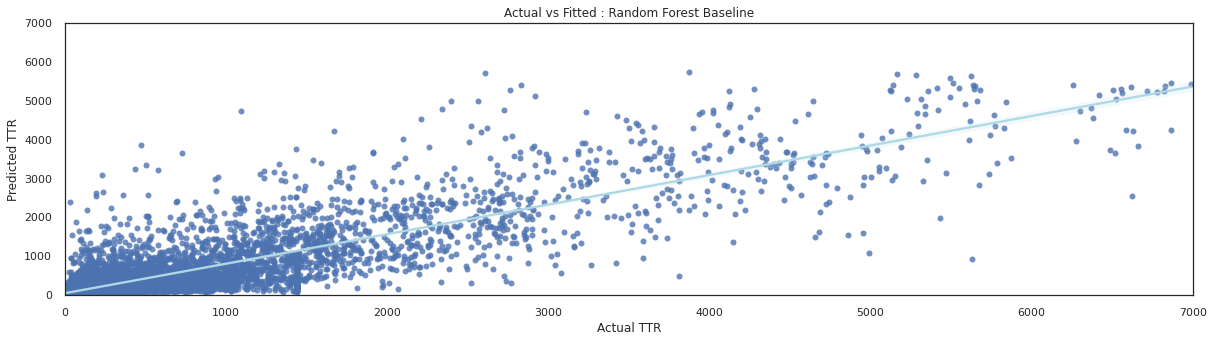

In [90]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result, line_kws={"color": "lightblue"})
ax.set_xlim(0,7000)
ax.set_ylim(0,7000)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

#### Storm

[Text(0.5, 0, 'Actual TTR'), Text(0, 0.5, 'Predicted TTR')]

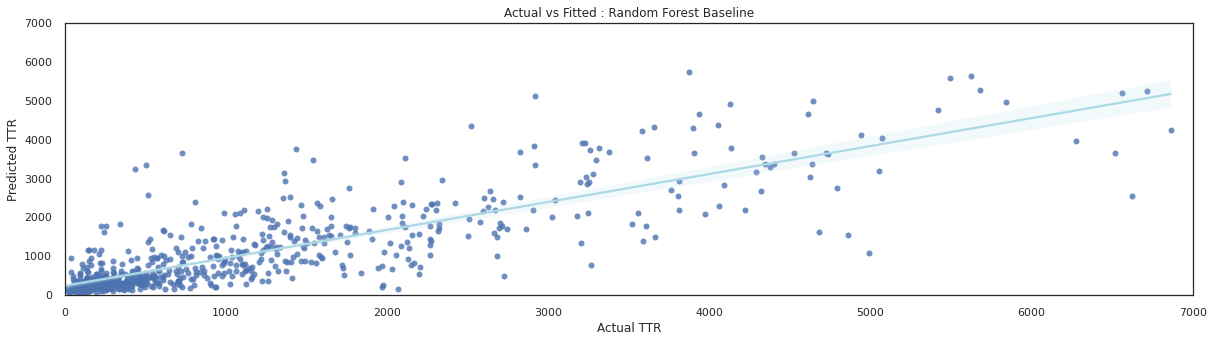

In [91]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result[df_result.EVENT == 'STORM'], line_kws={"color": "lightblue"})
ax.set_xlim(0,7000)
ax.set_ylim(0,7000)
ax.set_title('Actual vs Fitted : Random Forest Baseline')
ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

In [ ]:
#### Bluesky

In [ ]:
# sns.set(rc={'figure.figsize':(18,5)})
# sns.set_style("white")
# ax = sns.regplot(x="y_test", y="y_test_pred", data=df_result[df_result.EVENT == 'BLUE SKY'], line_kws={"color": "lightblue"})
# ax.set_xlim(0,1500)
# ax.set_ylim(0,1500)
# ax.set_title('Actual vs Fitted : Random Forest Baseline')
# ax.set(xlabel='Actual TTR', ylabel='Predicted TTR')

## Business metrics for Storm Events

In [92]:
business_KPI = customer_metrics_storm(df_result[df_result.EVENT == 'STORM'].y_test, df_result[df_result.EVENT == 'STORM'].y_test_pred)
df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage.loc[['0-120','120-240','240-360','360-480','480-600','600-720','720-840','960-1080','1080-1200','1200-1320','1320-1440','>1440'],['0-120','120-240','240-360','360-480','480-600','600-720','960-1080','1200-1320','1320-1440','>1440']]

Predicted_Values,0-120,120-240,240-360,360-480,480-600,600-720,960-1080,1200-1320,1320-1440,>1440
Actual_Values,,,,,,,,,,
0-120,3.5%,5.1%,1.9%,0.6%,0.6%,0.1%,0.0%,0.0%,0.0%,0.0%
120-240,1.5%,5.3%,4.7%,2.4%,0.7%,0.6%,0.1%,0.0%,0.0%,0.1%
240-360,0.1%,2.8%,3.2%,1.7%,0.6%,0.4%,0.0%,0.0%,0.0%,0.4%
360-480,0.0%,1.1%,2.2%,1.1%,1.8%,0.6%,0.0%,0.0%,0.0%,0.1%
480-600,0.0%,0.6%,1.0%,1.4%,0.7%,0.4%,0.3%,0.0%,0.3%,0.3%
600-720,0.0%,0.3%,1.0%,0.4%,0.4%,0.6%,0.1%,0.0%,0.0%,0.4%
720-840,0.0%,0.3%,0.1%,0.4%,0.6%,0.3%,0.4%,0.1%,0.1%,0.6%
960-1080,0.0%,0.0%,0.1%,0.0%,0.4%,0.3%,0.3%,0.0%,0.1%,0.6%
1080-1200,0.0%,0.0%,0.1%,0.3%,0.3%,0.7%,0.1%,0.3%,0.1%,0.4%


## Business metrics for Blue sky Events

In [93]:
business_KPI = customer_metrics(df_result[df_result.EVENT == 'BLUE SKY'].y_test, df_result[df_result.EVENT == 'BLUE SKY'].y_test_pred)
df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
df_percentage = df_percentage.fillna(0)
df_percentage = df_percentage.astype(str) + "%"
df_percentage

Predicted_Values,0-120,120-240,240-360,360-480,480-600,600-720,>720,total
Actual_Values,,,,,,,,
0-120,32.7%,14.2%,1.5%,0.2%,0.1%,0.0%,0.0%,48.7%
120-240,12.6%,11.2%,1.7%,0.4%,0.0%,0.1%,0.0%,25.9%
240-360,2.9%,5.1%,1.5%,0.7%,0.2%,0.0%,0.0%,10.4%
360-480,0.7%,3.1%,1.3%,0.6%,0.1%,0.0%,0.1%,6.0%
480-600,0.3%,1.8%,0.8%,0.3%,0.2%,0.0%,0.0%,3.5%
600-720,0.1%,0.9%,0.4%,0.3%,0.1%,0.0%,0.0%,1.8%
>720,0.3%,1.3%,0.9%,0.5%,0.2%,0.2%,0.2%,3.6%
total,49.6%,37.6%,8.0%,3.1%,0.9%,0.4%,0.4%,100.0%


## **Saving Model Object using Pickle File**

In [94]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')
fs.ls('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles')
with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_ADSv2.3_modified_Catboost_1_11232020_base.pkl', 'wb') as f:
    pickle.dump(cat_base, f)

In [ ]:
## **Load Model Object using Pickle File**

In [ ]:
# import gcsfs

# fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')

# with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_ADSv2.3_modified_Catboost11232020_base.pkl', 'rb') as f:
#     cat_rs = pickle.load(f)

# **Nov 15th Out of Sample Validation**

In [123]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
from datetime import date
import csv
import matplotlib.pyplot as plt
import math
import regex as re
from scipy.stats import linregress
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from IPython.display import display_html
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading Dataset

In [124]:
df_all = pd.read_csv('gs://aes-analytics-0002-curated/DPL/Backfilling/DPL_outage_20201115.csv')
df_all.head()

,Unnamed: 0,OUTAGE_ID,rank,rank_cd,ID,DEVICE_ID,CIRCUIT,DEVICE,TIME_OF_FIRST_CALL,PHASE_A_CUSTS,PHASE_B_CUSTS,PHASE_C_CUSTS,PHASE_T_CUSTS,PHASE_A_CALLS,PHASE_B_CALLS,PHASE_C_CALLS,PHASE_T_CALLS,BRANCHIND,PHASE_A,PHASE_B,PHASE_C,PHASE_T,TOTAL_CUSTS,SAFETY,SORTNUMBER,SORTLEVEL,DISPLOC,DISPATCHER,DELETED,ALLRESTORED,LFS_CUSTS,MED_CUSTS,EMR_CUSTS,UTL_CUSTS,MAJ_CUSTS,GOV_CUSTS,LRT_CUSTS,STATUS,OUTAGE_NAME,HOLD,WIREDOWN_PTH,WIREDOWN_PTP,TREEONWIRE_PTH,TREEONWIRE_PTP,BROKENPOLE,FIREEXPLOSION,DAMAGEDTRANS,CALL_TYPE,LATITUDE,LONGITUDE,ARC_INDEX,CLOSEST_CREW,PREFERRED_CREW,PRIORITY,CONFIDENCE,REMARKS,NSSORTLEVEL,ANALYZER,CUSTSTILLOUT,DATETIMEADDED,MADESAFE,CAUSE_ID,INTDEV_ID,FAILDEV_ID,CLAIMS,OVERTIME,WORKORDER,ECD,MATERIALHOLD,LASTUPDATE,ECD_OVERRIDE,URD_OUTAGE,SCOUTED,PREFERRED_SCOUT_CREW,TREE_VERIFIED,TREE_CLEARED,TREE_CLEARED_NO_WORK_NEEDED,PREFERRED_TREE_CREW,MATERIALS_DELIVERED,CALLED_CUSTOMER_OK,CREW_NEEDS_HELP,FILTER_ID,NONRES_CUSTS,NONRES_CALLS,PUBLIC_SAFETY,HYDRO_VAC_NEEDED,HYDRO_VAC_DISPATCHED,HYDRO_VAC_COMPLETED,Outages_in_last_1hr,Outages_in_last_2hr,Outages_in_last_3hr,Outages_in_last_4hr,Outages_in_last_5hr,Outages_in_last_6hr,Outages_in_last_7hr,Outages_in_last_8hr,Outages_in_last_9hr,Outages_in_last_10hr,Day_flag,Hour_Sin,Hour_Cos,DATE,RANK_SUBSEQUENT_OTG,weekday,Weekend_flag,Min_Distance_service_Center,Nearest_service_center,Min_Distance,Marker_Location,DEVICETYPE,DEVICESIZE,TOPFUSE,TOTCUST_A,TOTCUST_B,TOTCUST_C,TOTCUST_T,VOLTAGE,UNDERGD,NORMALLYOPEN,TOTKVA_A,TOTKVA_B,TOTKVA_C,Total_Crew_dispatched,Total_Crew_available,Line_crew,Service_crew,Substation_crew,Network_crew,Contractor,Customers,timestampInit,cldCvrMin,cldCvrAvg,cldCvrMax,dewPtMin,dewPtAvg,dewPtMax,feelsLikeMin,feelsLikeAvg,feelsLikeMax,heatIndexMin,heatIndexAvg,heatIndexMax,mslPresMin,mslPresAvg,mslPresMax,precip,precipProb,radSolarMin,radSolarAvg,radSolarMax,radSolarTot,relHumMin,relHumAvg,relHumMax,sfcPresMin,sfcPresAvg,sfcPresMax,snowfall,snowfallProb,spcHumMin,spcHumAvg,spcHumMax,tempMin,tempAvg,tempMax,windChillMin,windChillAvg,windChillMax,windDirAvg,windDir80mAvg,windDir100mAvg,windSpdMin,windSpdAvg,windSpdMax,windSpd80mMin,windSpd80mAvg,windSpd80mMax,windSpd100mMin,windSpd100mAvg,windSpd100mMax,wetBulbMin,wetBulbAvg,wetBulbMax,CALLCOUNT,MAJOR,TORD_False,TORD_True,ACCOUNT_TYPE_COM,ACCOUNT_TYPE_CUS,ACCOUNT_TYPE_GOV,ACCOUNT_TYPE_IND,ACCOUNT_TYPE_RES,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,PHASE_A_False,PHASE_A_True,PHASE_B_False,PHASE_B_True,PHASE_C_False,PHASE_C_True,PHASE_T_False,PHASE_T_True,WIREDOWN_PTH_False,WIREDOWN_PTH_True,WIREDOWN_PTP_False,WIREDOWN_PTP_True,TREEONWIRE_PTH_False,TREEONWIRE_PTH_True,TREEONWIRE_PTP_False,TREEONWIRE_PTP_True,BROKENPOLE_False,BROKENPOLE_True,FIREEXPLOSION_False,FIREEXPLOSION_True,DAMAGEDTRANS_False,DAMAGEDTRANS_True,PRIORITY_False,PRIORITY_True,ACCOUNT_TYPE_COM_False,ACCOUNT_TYPE_COM_True,ACCOUNT_TYPE_CUS_False,ACCOUNT_TYPE_CUS_True,ACCOUNT_TYPE_GOV_False,ACCOUNT_TYPE_GOV_True,ACCOUNT_TYPE_IND_False,ACCOUNT_TYPE_IND_True,ACCOUNT_TYPE_RES_False,ACCOUNT_TYPE_RES_True,Day_flag_False,Day_flag_True,Weekend_flag_False,Weekend_flag_True,TOPFUSE_False,TOPFUSE_True,UNDERGD_False,UNDERGD_True,NORMALLYOPEN_False,NORMALLYOPEN_True,Nearest_service_center_Greenville,CONFIDENCE_L,CONFIDENCE_H,CONFIDENCE_M,DEVICETYPE_PMH,weekday_Saturday,DEVICETYPE_F RISER,DEVICETYPE_SWTCHGEAR,Nearest_service_center_North Dayton,Nearest_service_center_DSB,Nearest_service_center_Sidney,Nearest_service_center_Marysville
0,0,1410031,27.0,19.0,1410031,3874,AV1223,AV-23,2020-11-15 01:36:50,16,13,5,3.0,2,0,0,0,1,-1,0,0,0,2,0,AV122301,1,0.0,0.0,0,-1,0,0,0,0,0,0,0,6,I-AV-23,0,0,0,0,0,0,0,0,2,39.766094,-84.255195,2,13744.0,13744,0,H,Emailed Order to 91-Linger @11/15 01:42[111501...,1,0,0,2020-11-15 01:39:45,0,21,11,12,0,0,0,2020-11-15 04:00:00,0,2020-11-15 03:45:03,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,1,2,2,3,4,6,7,10,False,0.258819,0.965926,2020-11-15,1.0,Sunday,True,5.438432,DSB,4.036640,Marker 26,CKT BK

In [125]:
def feature_add(group):
    group = group.reset_index(drop = True)
    x = [group.Outages_in_last_1hr[0],group.Outages_in_last_2hr[0],group.Outages_in_last_3hr[0],group.Outages_in_last_4hr[0],group.Outages_in_last_5hr[0]
        ,group.Outages_in_last_6hr[0],group.Outages_in_last_7hr[0],group.Outages_in_last_8hr[0],group.Outages_in_last_9hr[0],group.Outages_in_last_10hr[0]]
    y = [1,2,3,4,5,6,7,8,9,10]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    group['Slope_outages'] = slope
    
    ROC = [abs(group.Outages_in_last_1hr[0] - group.Outages_in_last_2hr[0]),abs(group.Outages_in_last_2hr[0] - group.Outages_in_last_3hr[0]),
           abs(group.Outages_in_last_3hr[0] - group.Outages_in_last_4hr[0]),abs(group.Outages_in_last_4hr[0] - group.Outages_in_last_5hr[0]),
           abs(group.Outages_in_last_5hr[0] - group.Outages_in_last_6hr[0]),abs(group.Outages_in_last_6hr[0] - group.Outages_in_last_7hr[0]),
           abs(group.Outages_in_last_7hr[0] - group.Outages_in_last_8hr[0]),abs(group.Outages_in_last_8hr[0] - group.Outages_in_last_9hr[0]),
           abs(group.Outages_in_last_9hr[0] - group.Outages_in_last_10hr[0])]
    y = [1,2,3,4,5,6,7,8,9]
    slope, intercept, r_value, p_value, std_err = linregress(ROC, y)
    group['Slope_ROC_outages'] = slope
    
    group['max_ROC_outages'] = max(ROC)
    group['max_index_ROC'] = 1+ROC.index(max(ROC))    
    group['weight_ROC'] = group['max_ROC_outages'] * group['max_index_ROC']*0.1
    return group

df_all = df_all.groupby(['OUTAGE_ID'], as_index = False).apply(feature_add).reset_index(drop = True)

df_all['TIME_OF_FIRST_CALL'] = pd.to_datetime(df_all['TIME_OF_FIRST_CALL'], errors = 'coerce')
df_all.sort_values(by=['TIME_OF_FIRST_CALL'], inplace = True)

# Total Customers
df_all['Total_Customers'] = df_all['TOTCUST_A'] + df_all['TOTCUST_B'] + df_all['TOTCUST_C']

# Total Key Customers
df_all['Total_Key_Customers'] = df_all['LFS_CUSTS'] + df_all['MED_CUSTS'] + df_all['EMR_CUSTS'] + df_all['UTL_CUSTS'] + df_all['MAJ_CUSTS'] + df_all['GOV_CUSTS'] + df_all['LRT_CUSTS']

# Month Cycle Capture
df_all['Month_Sin'] = np.sin(df_all.TIME_OF_FIRST_CALL.dt.month*(2.*np.pi/24))
df_all['Month_Cos'] = np.cos(df_all.TIME_OF_FIRST_CALL.dt.month*(2.*np.pi/24))
df_all['Month_Sin'] = np.sin(df_all.TIME_OF_FIRST_CALL.dt.month*(2.*np.pi/24))
df_all['Month_Cos'] = np.cos(df_all.TIME_OF_FIRST_CALL.dt.month*(2.*np.pi/24))

# Pole Related Causes
df_all['Pole'] = df_all['WIREDOWN_PTH'] +  df_all['WIREDOWN_PTP'] + df_all['TREEONWIRE_PTH'] + df_all['TREEONWIRE_PTP'] + df_all['BROKENPOLE']

# Accounting for busiest service centers location
df_all['Nearest_service_center_mod'] = df_all.Nearest_service_center.apply(lambda x: "Center" if ( (x== 'DSB') | (x== 'North Dayton') ) else "Not_Center")

### Dummifying Categorical Variables

In [126]:
object_columns = df_all.loc[:, (df_all.dtypes == object) | (df_all.dtypes == bool)]
print(list(object_columns.columns))

# Dummifying one hot code encoding
df_all = pd.get_dummies(df_all, columns=['CONFIDENCE', 'weekday', 'Marker_Location', 'Nearest_service_center',
                                   'DEVICETYPE','Nearest_service_center_mod'])
print(df_all.shape)

# Dropping duplicate columns
df_all = df_all.loc[:,~df_all.columns.duplicated()]

print(df_all.shape)

['CIRCUIT', 'DEVICE', 'SORTNUMBER', 'OUTAGE_NAME', 'CONFIDENCE', 'REMARKS', 'ANALYZER', 'DATETIMEADDED', 'ECD', 'LASTUPDATE', 'Day_flag', 'DATE', 'weekday', 'Weekend_flag', 'Nearest_service_center', 'Marker_Location', 'DEVICETYPE', 'DEVICESIZE', 'TOPFUSE', 'VOLTAGE', 'UNDERGD', 'NORMALLYOPEN', 'timestampInit', 'Nearest_service_center_mod']
(757, 339)
(757, 329)


### Running on Nov 15th Events

In [127]:
# df_all['Marker_Location_Marker 53'] = 0
# df_all['VOLTAGE_4KV']=0
# df_all['STORM_TYPE_others']=0 
# df_all['EVENT_STORM']=1
# df_all[['DEVICESIZE_65K70A', 'DEVICESIZE_140K140', 'DEVICESIZE_125E', 'DEVICESIZE_40K50A', 'DEVICESIZE_undecided', 'DEVICESIZE_600a', 'DEVICESIZE_*GG-1202', 'DEVICESIZE_SEEREMARKS', 'DEVICESIZE_40100K', 'DEVICESIZE_70A65K', 'DEVICESIZE_380630A', 'DEVICESIZE_70A', 'DEVICESIZE_65A', 'DEVICESIZE_250E', 'DEVICESIZE_140K70A', 'DEVICESIZE_1200']]=0
# df_all['STORM_TYPE_Ice']=0
# df_all['STORM_TYPE_Thunderstorm']=0
# df_all['STORM_TYPE_Lightning']=0

# Selecting Required Features
ads_15 = df_all[final_features]

# Running Predictions
y_pred_15 = cat_base.predict(ads_15)
# y_pred_15 = np.exp(y_pred_15)

### Adding Business Layer

In [128]:
def business_layer_add_addtional_time(predicted_values):
    '''
    Input - Prediction of Outages in minutes
    Output - If predicted values are less than 1440 min
    Add 45 mins to predictions, Else Add 360 mins to predictions
    '''
    new_pred_values = []
    for i in range(len(predicted_values)):
        if predicted_values[i] <= 1440:
            new_pred_values.append(predicted_values[i] + 45)
        elif predicted_values[i] > 1440:
            new_pred_values.append(predicted_values[i] + 360)
        else :
            new_pred_values.append(predicted_values[i])
    return new_pred_values

Y_TEST_PRED = business_layer_add_addtional_time(y_pred_15)

df_all['New_Model_Predictions'] = Y_TEST_PRED

### Getting 15th Diagnostic Results

In [129]:
# Reading diagnostic table
diag_15 = pd.read_csv('gs://aes-analytics-0002-curated/DPL/Backfilling/Diagnostic_15th.csv')
diag_15 = diag_15[['OUTAGE_ID', 'TTR_Model', 'TIME_OF_FIRST_CALL', 'DATETIMERELEASED', 'ERT', 'TTR_Actual', 'TTR_TCMS']]

# Combining Results
results_all = pd.merge(df_all[['OUTAGE_ID', 'New_Model_Predictions']], diag_15, how='inner', on='OUTAGE_ID')

# Comparison
print('Current Model MAE: ', mean_absolute_error(results_all.TTR_Actual, results_all.TTR_Model))
print('Current Model RMSE: ', rmse(results_all.TTR_Actual, results_all.TTR_Model))

print('New Model MAE: ', mean_absolute_error(results_all.TTR_Actual, results_all.New_Model_Predictions))
print('New Model RMSE: ', rmse(results_all.TTR_Actual, results_all.New_Model_Predictions))

Current Model MAE:  1476.1319407008084
Current Model RMSE:  1617.1795344985064
New Model MAE:  829.9201688374985
New Model RMSE:  1030.3048837364845


### Predictions Distribution without business layer

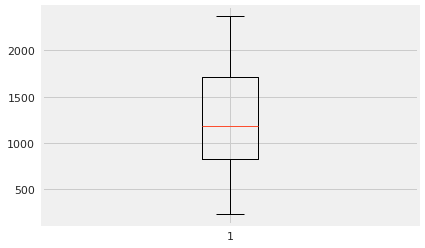

In [131]:
plt.boxplot(y_pred_15)
plt.show()

### Predictions Distribution with business layer

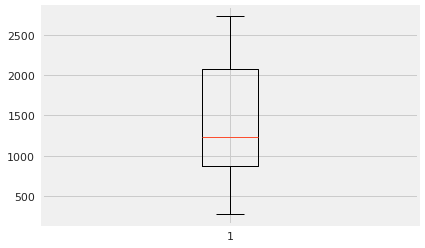

In [132]:
plt.boxplot(Y_TEST_PRED)
plt.show()

In [133]:
results_all.sort_values(by='New_Model_Predictions')

,OUTAGE_ID,New_Model_Predictions,TTR_Model,TIME_OF_FIRST_CALL,DATETIMERELEASED,ERT,TTR_Actual,TTR_TCMS
202,1411208,289.323417,539,11/15/2020 12:14,11/17/2020 14:49,11/15/2020 22:30,3035.25,615.78
216,1411314,313.644449,753,11/15/2020 12:22,11/17/2020 13:21,11/16/2020 13:38,2939.47,1516.63
10,1410048,346.656200,301,11/15/2020 4:42,11/15/2020 6:12,11/15/2020 7:30,89.65,167.22
28,1410109,352.478322,326,11/15/2020 10:32,11/16/2020 7:22,11/15/2020 14:00,1250.00,207.58
24,1410098,362.228153,263,11/15/2020 9:52,11/15/2020 11:48,11/15/2020 14:00,116.15,247.32
8,1410044,439.448649,120,11/15/2020 4:12,11/15/2020 9:18,11/15/2020 6:30,305.80,137.12
33,1410118,463.572437,276,11/15/2020 10:43,11/16/2020 11:58,11/15/2020 13:30,1515.05,166.13
43,1410220,466.546443,352,11/15/2020 10:58,11/16/2020 6:22,11/15/2020 17:00,1163.87,361.72
0,1410031,507.305423,132,11/15/2020 1:36,11/15/2020 3:44,11/15/2020 4:00,127.92,143.17
44,1410225,525.925346,485,11/15/2020 11:00,11/17/2020 5:29,11/15/2020 16:30,2548.95,329.20


In [ ]:
### Writing to dummy bigquery table

In [121]:
import warnings
import logging
import datetime
import pandas as pd
import numpy as np
from pandas.io import gbq

PROJECT_ID = 'aes-analytics-0002'
DATASET = 'mds_outage_restoration'
TABLE = 'DPL_New_Model_15'

results_all['TTR_Model'] = results_all['New_Model_Predictions']
results_all.drop(columns=['New_Model_Predictions'], inplace = True)

In [122]:
results_all.to_gbq("""{dataset}.{output_tbl}""".format(dataset=DATASET, output_tbl=TABLE),
           project_id=PROJECT_ID, chunksize=None, reauth=False, if_exists='replace',
           auth_local_webserver=False, table_schema=None, location=None,
           progress_bar=True, credentials=None)

1it [00:03,  3.17s/it]


In [ ]:
# df_all[['ID','predictions']].to_csv('gs://aes-analytics-0002-curated/DPL/Backfilling/CATBoost_predictions_nov15_v1.csv')

In [ ]:
# results_all.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Datarobo_RF_Model_2020_Results_Ckt_lvl_OT_1.csv')